In [1]:
# Count vectorization followed by TF-IDF versus,    Direct TF-IDF without Count vectorization
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\workspace\NLP_CV\day_5\smsspamcollection.tsv', sep='\t')

In [3]:
# Basic Inspection
print(" ==== Sample Data ====")
print(df.head())
print(" ==== Missing Values ====")
print(df.isnull().sum())
print(" ==== Label Distribution ==== ")
print(df['label'].value_counts())

 ==== Sample Data ====
  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2
 ==== Missing Values ====
label      0
message    0
length     0
punct      0
dtype: int64
 ==== Label Distribution ==== 
label
ham     4825
spam     747
Name: count, dtype: int64


In [4]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [5]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)         # X_train_counts is the Output of count vectorizer 

print("\n ==== Count vectorizer matrix shape ====")
print(X_train_counts.shape)


 ==== Count vectorizer matrix shape ====
(3733, 7082)


In [6]:
# Show sample count vector
count_feature_names = count_vect.get_feature_names_out()
sample_index = 0
sample_message = X_train.iloc[sample_index]
print(f"\n Sample MEssage : \n {sample_message}")
print("\n Count Vector (non - zero terms) : ")
sample_vector = X_train_counts[sample_index]
df_count_sample = pd.DataFrame(sample_vector.toarray(), columns = count_feature_names)
print(df_count_sample.loc[:, df_count_sample.any()].T)                                      # It just counts the words not the emoji's or single letter words


 Sample MEssage : 
 Yup ü not comin :-(

 Count Vector (non - zero terms) : 
       0
comin  1
not    1
yup    1


In [7]:
count_vect.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zoom', 'zouk', 'èn'],
      shape=(7082,), dtype=object)

In [8]:
# TF-IDF from COunt Vector
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tdidf = tfidf_transformer.fit_transform(X_train_counts)

In [9]:
print("\n==== TF-IDF (from Count) Shape ====")
print(X_train_tdidf.shape)


==== TF-IDF (from Count) Shape ====
(3733, 7082)


In [10]:
# Show sample TF-IDF values
sample_vector = X_train_tdidf[sample_index]
df_tfidf_sample = pd.DataFrame(
    sample_vector.toarray(), columns = count_feature_names)

In [11]:
print("\nTF-IDF (from Count) Vector (non_zero terms) : ")
print(df_tfidf_sample.loc[:, df_tfidf_sample.any().T])


TF-IDF (from Count) Vector (non_zero terms) : 
      comin       not      yup
0  0.713505  0.358529  0.60197


In [12]:
# part-3 : Direct TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf_direct = vectorizer.fit_transform(X_train)

In [13]:
print("\n ==== Direct TF-IDF Shape ====")
print(X_train_tfidf_direct.shape)


 ==== Direct TF-IDF Shape ====
(3733, 7082)


In [14]:
# Show sample from direct TF-IDF
direct_feature_names = vectorizer.get_feature_names_out()
sample_vector_direct = X_train_tfidf_direct[sample_index]
df_direct_sample = pd.DataFrame(sample_vector_direct.toarray(), columns=direct_feature_names)

print("\n Direct TF-IDF Vector (non-zero terms) : ")
print(df_direct_sample.loc[:, df_direct_sample.any()].T)


 Direct TF-IDF Vector (non-zero terms) : 
              0
comin  0.713505
not    0.358529
yup    0.601970


In [15]:
# Classification into spam/ham
# First view class ditribution
import seaborn as sns
import matplotlib.pyplot as plt

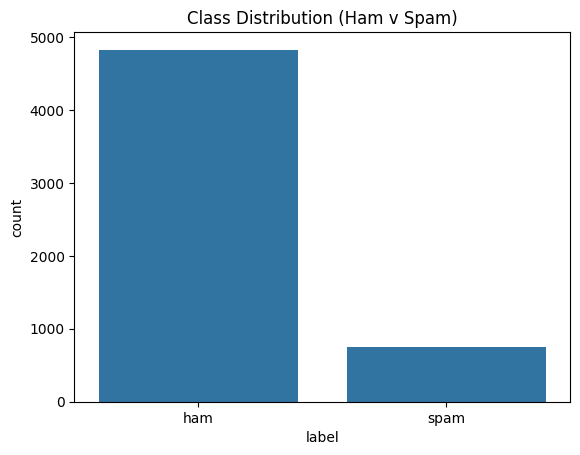

In [16]:
sns.countplot(x='label', data=df)
plt.title("Class Distribution (Ham v Spam)")
plt.show()

In [17]:
X_train_tfidf_direct = vectorizer.fit_transform(X_train)
X_test_tfidf_direct = vectorizer.transform(X_test)

In [18]:
# Now Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf_direct, y_train)

MultinomialNB()

In [20]:
# predict on test data
y_pred = clf.predict(X_test_tfidf_direct)

In [21]:
# Show wrong ones : 
misclassified = X_test[y_test != y_pred]
print("\n ==== Misclassified Messages ====")
for i, msg in enumerate(misclassified[:5]):
    print(f"\n{i+1}. Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    print(msg)


 ==== Misclassified Messages ====

1. Actual: ham, Predicted: ham
Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.

2. Actual: ham, Predicted: ham
Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394973 from Landline DATEBox1282EssexCM61XN 150p/min 18

3. Actual: ham, Predicted: ham
Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg £1.50

4. Actual: ham, Predicted: ham
Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.

5. Actual: ham, Predicted: ham
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)


In [22]:
# Evaluate the model
print("==== classification report ====")
print(classification_report(y_test, y_pred))
print("==== confusion matrix ====")
print(confusion_matrix(y_test, y_pred))
print("==== Accuracy ====")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

==== classification report ====
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839

==== confusion matrix ====
[[1593    0]
 [  70  176]]
==== Accuracy ====
96.19%


In [23]:
# Test on some samples : 
def predict_message(msg):
    msg_tfidf = vectorizer.transform([msg])
    pred = clf.predict(msg_tfidf)[0]
    prob = clf.predict_proba(msg_tfidf).max()
    print(f"\nPrediction: {pred.upper()} (Confidence: {prob:.2f})")

In [24]:
# Try
predict_message("Congratulations! You've won a $1000 gift card")
predict_message("Hey, are we still meeting today?")
predict_message("Free gift! click here")
predict_message("The team will do the project along with partering company")


Prediction: SPAM (Confidence: 0.58)

Prediction: HAM (Confidence: 1.00)

Prediction: HAM (Confidence: 0.67)

Prediction: HAM (Confidence: 0.97)


In [25]:
# ------------------------------------
# Most Informative Words (SPAM vs HAM)
# ------------------------------------
import numpy as np

In [26]:
# Get feature nmaes (words) from the TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

In [27]:
# Get class labels ( should be [ 'ham' , 'spam'])
class_labels = clf.classes_

In [28]:
# Get log probabilities for each word per class
log_probs = clf.feature_log_prob_

In [29]:
# For each class, show top 15 indicative words
print(" ---- Top 15 indicative words for each class ----")
for i, label in enumerate(class_labels):
    top_indices = log_probs[i].argsort()[::-1][:15]
    top_words = feature_names[top_indices]
    print(f"\nTop words for '{label}':")
    print(", ".join(top_words))

 ---- Top 15 indicative words for each class ----

Top words for 'ham':
you, to, the, me, in, it, my, and, is, ok, that, are, can, have, not

Top words for 'spam':
to, call, free, your, or, you, for, now, txt, mobile, text, reply, stop, the, claim


In [30]:
# TO impress people

from wordcloud import WordCloud

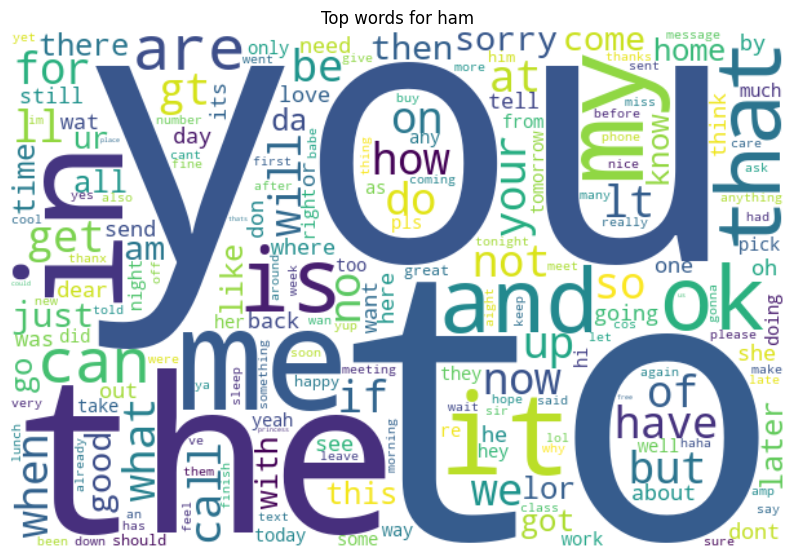

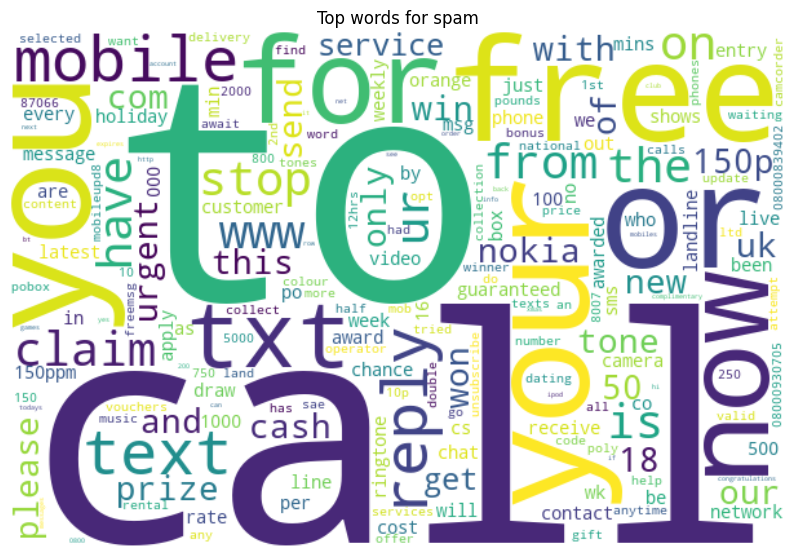

In [31]:
for i, label in enumerate(class_labels):
    word_scores = {word:log_probs[i, idx] for idx, word in enumerate(feature_names)}
    wc = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_scores)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top words for {label}')
    plt.show()

In [32]:
# --------------------------------------------
# Chi-square scores for most informative words
# H0: The specific word is independent of the message label (spam/ham), i.e. it cannot predict
# --------------------------------------------
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)    # Spam=1; ham=0

# Compute chi-squared stats
chi2_scores, p_vals = chi2(X_train_tfidf_direct, y_train_encoded)

# Sort scores descending
top_indices = np.argsort(chi2_scores)[::-1][:20]

In [34]:
print("\n[Chi-Square] Top 20 informative words : ")      # top 20 words that are contributing in deciding the word which is most dependent for ctegorizing spam or ham
for i in top_indices:
    print(f"{feature_names[i]} (score={chi2_scores[i]:.2f})")


[Chi-Square] Top 20 informative words : 
free (score=95.10)
txt (score=79.73)
claim (score=75.40)
www (score=68.25)
mobile (score=67.09)
prize (score=60.69)
150p (score=50.57)
call (score=50.31)
uk (score=49.58)
tone (score=46.23)
reply (score=45.55)
stop (score=45.44)
cash (score=44.96)
18 (score=44.40)
guaranteed (score=43.71)
nokia (score=43.29)
win (score=40.69)
urgent (score=39.51)
1000 (score=39.33)
service (score=38.98)


In [35]:
!pip install imblearn

In [36]:
# SMOTE : because we have less spams as compared to hams
from imblearn.over_sampling import SMOTE

# Convert sparse metrix to dense 
X_train_dense = X_train_tfidf_direct.toarray()

# Encode labels to numeric for SMOTE
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)          # Ham=0, spam=1

In [37]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dense, y_train_encoded)

In [38]:
print("Before SMOTE : ", np.bincount(y_train_encoded))
print("After SMOTE : ", np.bincount(y_train_resampled))

Before SMOTE :  [3232  501]
After SMOTE :  [3232 3232]


In [39]:
# Visualize 
# Convert numeric labels back to original labels
y_resampled_labels = le.inverse_transform(y_train_resampled)

# Create dataframe for plotting
df_resampled = pd.DataFrame({'label': y_resampled_labels})

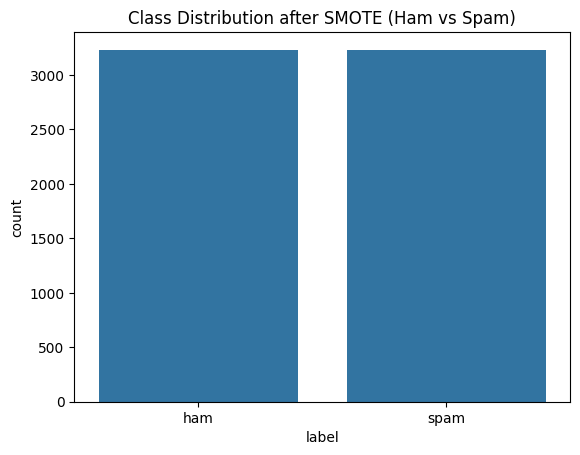

In [40]:
# Plot class distribution after SMOTE
sns.countplot(x='label', data=df_resampled)
plt.title("Class Distribution after SMOTE (Ham vs Spam)")
plt.show()

In [41]:
# Train Naive Bayes on the resampled data
clf_smote = MultinomialNB()
clf_smote.fit(X_train_resampled, y_train_resampled)

# Prepare test data (still sparse) and encode test labels
X_test_dense = X_test_tfidf_direct.toarray()
y_test_encoded = le.transform(y_test)

# Predict on test set
y_pred_smote = clf_smote.predict(X_test_dense)

# Decode predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred_smote)

In [42]:
# Confusion Matrix and accuracy
confusion_matrix(y_test, y_pred_labels)

array([[1567,   26],
       [   9,  237]])

In [43]:
accuracy_score(y_test, y_pred_labels)

0.9809679173463839

In [44]:
# Try
predict_message("Congratulations! You've won a $1000 gift card")
predict_message("Hey, are we still meeting today?")
predict_message("Free gift! click here")
predict_message("The team will do the project along with partering company")


Prediction: SPAM (Confidence: 0.58)

Prediction: HAM (Confidence: 1.00)

Prediction: HAM (Confidence: 0.67)

Prediction: HAM (Confidence: 0.97)
